In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Generate random 2D integer data in the range [10, 90]
np.random.seed(42)
data = np.random.randint(10, 91, size=(20, 2))

In [5]:
data

array([[61, 24],
       [81, 70],
       [30, 84],
       [84, 33],
       [12, 31],
       [62, 11],
       [39, 47],
       [11, 73],
       [69, 30],
       [42, 85],
       [67, 31],
       [58, 68],
       [51, 69],
       [89, 24],
       [71, 71],
       [56, 71],
       [60, 64],
       [73, 12],
       [60, 16],
       [30, 82]])

In [9]:
# Function to plot data and split lines
def plot_data_and_splits(data, split_points):
    plt.scatter(data[:, 0], data[:, 1], color='blue', label='Data')
    for split_point, split_dim in split_points:
        if split_dim == 0:
            plt.plot([split_point, split_point], [10, 90], color='red', linestyle='--', label='Split X')
        else:
            plt.plot([10, 90], [split_point, split_point], color='green', linestyle='--', label='Split Y')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('KD-tree Splits')
    plt.legend()
    plt.show()

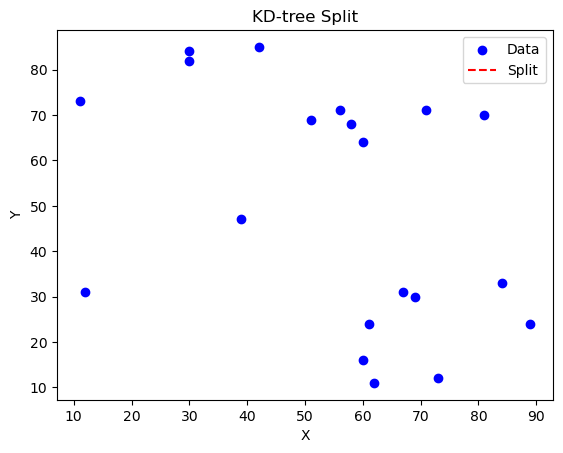

In [10]:
# Plot entire dataset
plot_data_and_split(data, None, None)

In [11]:
# Construct KD-tree iteratively
current_data = data.copy()
split_points = []
for dim in range(2):  # Iterate over dimensions (0 for X, 1 for Y)
    split_point = np.median(current_data[:, dim])
    split_points.append((split_point, dim))
    
    # Split data based on median along current dimension
    left_subset = current_data[current_data[:, dim] < split_point]
    right_subset = current_data[current_data[:, dim] >= split_point]
    
    # Update current data for next iteration
    current_data = left_subset if dim == 0 else right_subset

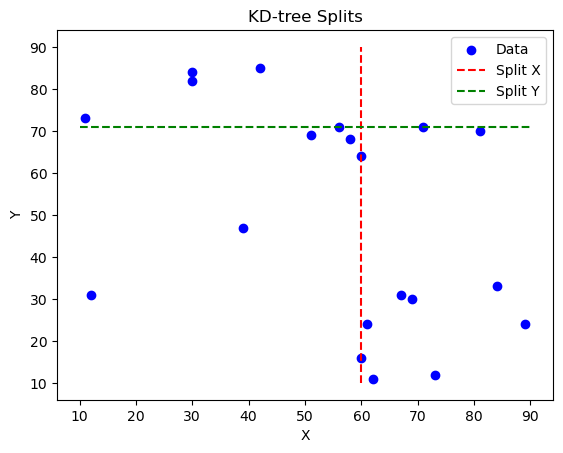

In [12]:
# Plot entire dataset with splits
plot_data_and_splits(data, split_points)

#### Implement KNN with KD Tree settings

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KDTree
from sklearn.metrics import accuracy_score

In [14]:
# Load breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size   = 0.2, 
                                                    random_state= 42)


In [16]:
# Construct KD-tree using training data
kd_tree = KDTree(X_train, leaf_size=15)

In [17]:
# Function to perform KNN classification using KD-tree
def knn_with_kd_tree(kd_tree, X_train, y_train, X_test, k):
    _, indices = kd_tree.query(X_test, k=k)
    y_pred = []
    for neighbors in indices:
        labels = [y_train[idx] for idx in neighbors]
        prediction = max(set(labels), key=labels.count)
        y_pred.append(prediction)
    return y_pred

In [18]:
# Number of nearest neighbors to consider
k = 5

In [19]:
# Perform KNN classification using KD-tree
y_pred = knn_with_kd_tree(kd_tree, X_train, y_train, X_test, k)

In [20]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.956140350877193


**Using algorithm** parameter of KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# Create KNeighborsClassifier with algorithm='kd_tree' and leaf_size=15
knn_classifier = KNeighborsClassifier(n_neighbors=5, 
                                      algorithm='kd_tree', 
                                      leaf_size=15)


In [23]:
# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=15)

In [24]:
# Perform prediction on the test data
y_pred = knn_classifier.predict(X_test)

D:\Anaconda-16-FEB\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [25]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.956140350877193
